# Trabajo Regresión lineal: predicción de la nota media de los alumnos de grado de la ETSIT, UPCT. Primera parte.
## Introducción


> En este trabajo, usamos datos asociados a todos los alumnos de Grado en Ingeniería Telemática y Grado en Ingeniería de Sistemas de Telecomunicación de la UPCT, que hayan superado 120 ECTS, que provengan de la Región de Murcia y que se hayan examinado de Física y Matemáticas_II en la Prueba de Acceso a la Universidad (PAU).

## Objetivo:

Nuestro objetivo es estudiar la posibilidad de predecir la nota media a partir de algunos datos en el ingreso del estudiante (calificación y ranking PAU, así como de Física y Matemáticas II) y de sus resultados en algunas de las asignaturas más exigentes de la titulación:

1. Fundamentos de programación.
2. Sistemas y circuitos
3. Sistemas lineales
4. Ondas electromagnéticas

El fichero que contiene los datos es `notas_DURM_media_ETSIT.csv` que se puede descargar del Aula Virtual y guardar en la carpeta data del directorio asociado a nuestro nuevo proyecto. 

Después de cargar las librerías `pandas`, `numpy` y `matplotlib`, cargar los datos en un dataframe llamado `grados`.

In [18]:
# Completar aquí

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path

DATA_DIRECTORY = path.join('..', 'data')

# --------------------


In [19]:
# Completar aquí

grados = pd.read_csv(
    path.join(DATA_DIRECTORY,  'notas_DURM_media_ETSIT.csv'),
    sep=','
)

# --------------------
grados

,PLAN_ID,CREDITOS,MEDIA,CURSO_INICIO,NOTA_PAU_FISICA,NOTA_PAU_MATEMATICAS II,NOTA_PAU_CALIFICACION,PLAN_DESC,NOTA_FUNDAMENTOS DE PROGRAMACIÓN,NOTA_ONDAS ELECTROMAGNÉTICAS,...,MATRICS_TOTALES_SISTEMAS Y CIRCUITOS,MATRICS_TOTALES_TEORÍA DE LA COMUNICACIÓN,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_FUNDAMENTOS DE PROGRAMACIÓN,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_ONDAS ELECTROMAGNÉTICAS,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_SISTEMAS Y CIRCUITOS,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_TEORÍA DE LA COMUNICACIÓN,CONVOCS_TOTALES_FUNDAMENTOS DE PROGRAMACIÓN,CONVOCS_TOTALES_ONDAS ELECTROMAGNÉTICAS,CONVOCS_TOTALES_SISTEMAS Y CIRCUITOS,CONVOCS_TOTALES_TEORÍA DE LA COMUNICACIÓN
0,5041,234.0,8.810897,2010-11,9.6,9.80,9.34,GRADO EN INGENIERÍA EN SISTEMAS DE TELECOMUNIC...,8.6,7.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
1,5041,222.0,7.472973,2010-11,2.3,9.25,7.43,GRADO EN INGENIERÍA EN SISTEMAS DE TELECOMUNIC...,5.0,5.5,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0
2,5041,228.0,8.051316,2010-11,8.7,7.25,8.10,GRADO EN INGENIERÍA EN SISTEMAS DE TELECOMUNIC...,6.9,5.5,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
3,5041,222.0,8.673649,2010-11,9.8,9.00,9.15,GRADO EN INGENIERÍA EN SISTEMAS DE TELECOMUNIC...,9.0,6.0,...,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0
4,5041,240.0,7.425000,2010-11,4.1,9.00,7.97,GRADO EN INGENIERÍA EN SISTEMAS DE TELECOMUNIC...,8.4,6.3,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,4.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,5051,120.0,8.135000,2018-19,5.1,10.00,9.57,GRADO EN INGENIERÍA TELEMÁTICA (BOE 20-04-2011),10.0,7.3,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
314,5051,120.0,9.040000,2018-19,10.0,10.00,9.68,GRADO EN INGENIERÍA TELEMÁTICA (BOE 20-04-2011),10.0,9.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
315,5051,120.0,8.075000,2018-19,5.4,8.75,8.38,GRADO EN INGENIERÍA TELEMÁTICA (BOE 20-04-2011),8.5,8.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
316,5051,120.0,8.500000,2018-19,8.0,9.00,8.54,GRADO EN INGENIERÍA TELEMÁTICA (BOE 20-04-2011),9.0,8.1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


- La variable `MEDIA` es la nota media sobre 10 del alumno, ponderada por los créditos de cada asignatura.
- Las variables que contienen `PAU` corresponden a lo obtenido por el alumno en el examen de acceso a la universidad, en particular `NOTA_PAU_CALIFICACION` es la nota media sobre 10.

Realizad una exploración del fichero de datos, obteniendo el número de registros para cada variable, si tienen datos faltantes, indicadores como su máximo, mínimo, etc.

In [20]:
# Completar aquí, exploración del conjunto
grados.describe()

# --------------------

,PLAN_ID,CREDITOS,MEDIA,NOTA_PAU_FISICA,NOTA_PAU_MATEMATICAS II,NOTA_PAU_CALIFICACION,NOTA_FUNDAMENTOS DE PROGRAMACIÓN,NOTA_ONDAS ELECTROMAGNÉTICAS,NOTA_SISTEMAS Y CIRCUITOS,NOTA_TEORÍA DE LA COMUNICACIÓN,...,MATRICS_TOTALES_SISTEMAS Y CIRCUITOS,MATRICS_TOTALES_TEORÍA DE LA COMUNICACIÓN,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_FUNDAMENTOS DE PROGRAMACIÓN,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_ONDAS ELECTROMAGNÉTICAS,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_SISTEMAS Y CIRCUITOS,CONVOCS_HASTA_PRESENTARSE_1RA_VEZ_TEORÍA DE LA COMUNICACIÓN,CONVOCS_TOTALES_FUNDAMENTOS DE PROGRAMACIÓN,CONVOCS_TOTALES_ONDAS ELECTROMAGNÉTICAS,CONVOCS_TOTALES_SISTEMAS Y CIRCUITOS,CONVOCS_TOTALES_TEORÍA DE LA COMUNICACIÓN
count,318.000000,318.000000,318.000000,275.000000,301.000000,313.000000,277.000000,290.000000,284.000000,291.000000,...,284.000000,291.000000,277.000000,290.000000,284.000000,291.000000,277.000000,290.000000,284.000000,291.000000
mean,5045.937107,186.251572,7.170736,5.907200,6.494651,7.456965,7.453069,6.094138,6.253873,6.589347,...,1.359155,1.597938,1.675090,2.710345,1.623239,1.817869,2.036101,3.893103,2.154930,2.783505
std,5.007484,36.566817,0.649487,2.245361,2.346454,1.090931,1.561180,0.958228,1.230740,1.138627,...,0.604360,0.850879,1.363018,1.954207,1.281406,1.435206,1.880139,2.753850,1.717899,2.344002
min,5041.000000,120.000000,5.908046,0.000000,0.000000,5.180000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5041.000000,156.000000,6.705398,4.100000,5.000000,6.610000,6.100000,5.425000,5.200000,5.700000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
50%,5041.000000,192.000000,7.037259,6.280000,6.530000,7.540000,7.500000,5.950000,5.900000,6.400000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000
75%,5051.000000,221.000000,7.487365,7.600000,8.500000,8.210000,8.800000,6.500000,7.000000,7.300000,...,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,5.000000,3.000000,4.000000
max,5051.000000,244.000000,9.559259,10.000000,10.000000,9.740000,10.000000,10.000000,10.000000,9.800000,...,4.000000,5.000000,11.000000,10.000000,11.000000,10.000000,12.000000,15.000000,11.000000,13.000000


## Primer paso: modelo simplificado

Vamos a empezar con un modelo simplificado donde sólo consideramos en cuanto a perfiles de ingreso, la nota  PAU. 

### Representación gráfica
Obtened una gráfica de la nota media en el grado en función de la calificación PAU

Text(0, 0.5, 'Nota media ponderada en el grado')

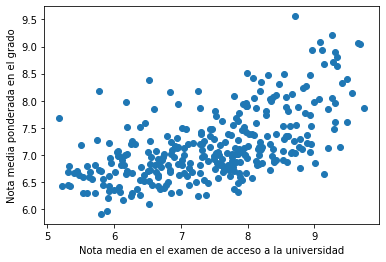

In [21]:
# Completar aquí
fig, ax = plt.subplots()
plt.scatter(grados['NOTA_PAU_CALIFICACION'],grados['MEDIA'])
plt.xlabel('Nota media en el examen de acceso a la universidad')
plt.ylabel('Nota media ponderada en el grado')
# --------------------


### Ajuste de una recta, usando el algoritmo de gradiente


En esta parte, vamos a ajustar una recta para intentar explicar la nota media en función del ranking del alumno en la  PAU. Aunque, sea mucho (muchísimo!) más sencillo usar `LinearRegression` de `scikit-learn` para realizar el ajuste, implementaremos el algoritmo del gradiente para ir encontrando el mínimo de la función coste. 

Lo haremos en varias etapas...

#### Implementación de la función coste.

Recordar que la función coste es (ver transparencias):
$$J(\theta)=\frac{1}{n}\sum_{i=1}^n\left(y_i-x_{i\bullet}^T\theta\right)^2=\frac{1}{n}\lvert\lvert \mathbf{y}-\mathbf{X}\theta\rvert\rvert^2=\frac{1}{n}\left(\mathbf{y}-\mathbf{X}\theta\right)^T\cdot \left(\mathbf{y}-\mathbf{X}\theta\right),$$
donde $\mathbf{y}$ es el vector que contiene todas las observaciones de la variable respuesta, y la matriz $\mathbf{X}$ la matriz de diseño. La matriz de diseño contiene los valores de las características que queremos tener en cuenta en nuestro modelo para todos los individuos y una columna de 1.

Definir el array de numpy `y` que contenga los valores de MEDIA, y el array `X` que sea la matriz de diseño asociada a la fórmula: 

$$MEDIA=\theta_0+\theta_1 NOTA\_PAU\_CALIFICACION$$
pero habiendo, en primer lugar, quitado las filas que tienen un dato faltante en alguna de estas dos columnas

Para definir `X`, habrá que usar `np.concatenate`, y `np.ones` tal como está explicado en las transparencias del tema.


In [22]:
# Completar aquí
grados.dropna(subset = ['MEDIA', 'NOTA_PAU_CALIFICACION'], inplace = True)
y = np.array(grados['MEDIA'])
X = np.concatenate(
    [np.ones((grados.shape[0],1)), grados.loc[:, 'NOTA_PAU_CALIFICACION'].values.reshape(-1,1)],
    axis=1
)
# --------------------
print(f'10 primeros valores de y: \n {y[:10]}')
print(f'10 primeras filas de X:\n {X[:10, :]}')

10 primeros valores de y: 
 [8.81089744 7.47297297 8.05131579 8.67364865 7.425      8.04539474
 6.53690476 9.07039474 6.87152778 9.08881579]
10 primeras filas de X:
 [[1.   9.34]
 [1.   7.43]
 [1.   8.1 ]
 [1.   9.15]
 [1.   7.97]
 [1.   9.27]
 [1.   7.92]
 [1.   9.66]
 [1.   7.83]
 [1.   9.09]]


Podemos ahora definir la función coste, que se llamará `J`  y que admita los parámetros `theta`, `X` e `y`.

In [23]:
# Completar aquí
def J (theta, X, y) : 
    return 1 / y.shape[0] * np.matmul((y - np.matmul(X, theta)).T , (y - np.matmul(X, theta)))
# --------------------
J(np.array([1, 1]), X, y)

2.4236770059707693

El gradiente de la función coste se puede escribir de manera compacta (ver transparencias) 
$$\nabla J(\theta)=\frac{2}{n} \mathbf{X}^T\cdot \left(\mathbf{X}\theta-y\right).$$
Pasamos a definirla también con el nombre `gradJ`

In [24]:
# Completar aquí
def gradJ(theta, X, y):
    return (2 / y.shape[0] * np.matmul(X.T, np.matmul(X, theta) - y))
# --------------------
gradJ(np.array([1, 1]), X, y)

array([ 2.56988768, 20.70162311])

#### Implementación del algoritmo del gradiente

Una vez que tenemos implementada la función de coste y su gradiente, podemos escribir el código para el algoritmo iterativo del gradiente.

Empezamos por fijar un valor inicial de theta, el valor de $\alpha$, el learning rate y también el número máximo de iteraciones que autorizaremos para el algoritmo.




In [25]:
theta_inicial = np.array([1, 1])
alpha = 0.001
iteraciones =  3000

Usando un bucle implementad el algoritmo del gradiente usando la fórmula de actualización, a cada etapa:
$$\theta\leftarrow \theta-\alpha \nabla J(\theta).$$


In [26]:
# Completar aquí
theta = theta_inicial
for i in range(iteraciones):
    theta = theta - alpha * gradJ(theta, X, y)
# --------------------

theta

array([1.39062093, 0.76660468])

### Debemos monitorizar el algoritmo del gradiente

Para comprobar cómo evoluciona el algoritmo del gradiente y en particular, si hemos escogido bien el valor de $\alpha$, es importante comprobar la evolución del valor de la función coste con las iteraciones.

Para ello vamos a introducir un DataFrame llamado monitor, que recoja los valores de `alpha`, `theta`, `J(theta, X, y)` y `gradJ(theta, X, y)` a medida que vamos iterando el algoritmo. 

Empezamos por definir dos funciones que faciliten el manipular el dataframe monitor:
- la primera función `inicializa_monitor` que devuelve un dataframe preparado con las columnas necesarias y con el tipo apropiado.
- la segunda función `inserta_en_monitor`, que añade a `monitor` una fila con los valores de iteracion, alpha, theta y el coste.

In [27]:
# Nada que completar pero sí entender el código
def inicializa_monitor():
    monitor = pd.DataFrame(
        {
            'alpha': float(), 
            'theta_0': float(), 
            'theta_1': float(), 
            'coste': float()
        }, 
        index=[]
    )
    return monitor
# ------------------------------------------------------------------------------------------------------
def inserta_en_monitor(monitor, iteracion, alpha, theta, coste):
    fila = pd.DataFrame(
         {
             'alpha': alpha, 
             'theta_0': theta[0], 
             'theta_1': theta[1], 
             'coste': coste
        }, 
        index=[iteracion]
    )
    return monitor.append(fila)



Tenéis ahora que aprovechar vuestra implementación del algoritmo del gradiente para crear una nueva función `buscar_optimo_gradiente` que admita los siguientes parámetros:
- theta_inicial: un vector `numpy` de valores para los componentes de theta_inicial 
- coste: la función de coste definida, que tome como parámetro theta
- gradiente: la función que calcule el gradiente de la función de coste
- alpha: el paso escogido para cada iteración  
- iteraciones: el número total de iteraciones que se realiza hasta parar y devolver el óptimo
- monitor: el dataframe que contiene la evolución de las cantidades de interés durante la iteración.
Tendrá que devolver un tupla que contenga theta, el valor final de theta encontrado, y el dataframe monitor

In [28]:
# Completar aquí: Definir buscar_optimo_gradiente
def buscar_optimo_gradiente(theta, coste, gradiente, alpha, iteraciones, monitor):
    for i in range(iteraciones):
        monitor = inserta_en_monitor(monitor, i, alpha, theta, coste(theta, X, y))
        theta = theta - alpha * gradiente(theta, X, y)
    return theta, monitor

# --------------------
monitor = inicializa_monitor()
theta, monitor = buscar_optimo_gradiente(
    theta_inicial,
    coste=J,
    gradiente=gradJ,
    iteraciones=iteraciones,
    alpha=0.001,
    monitor=monitor
)
print(f'El valor final de theta es {theta}')
print(f'El dataframe monitor es: {monitor}')


El valor final de theta es [1.39062093 0.76660468]
El dataframe monitor es:       alpha   theta_0   theta_1     coste
0     0.001  1.000000  1.000000  2.423677
1     0.001  0.997430  0.979298  2.013654
2     0.001  0.995174  0.960986  1.692905
3     0.001  0.993196  0.944788  1.441989
4     0.001  0.991463  0.930459  1.245703
...     ...       ...       ...       ...
2995  0.001  1.389972  0.766690  0.482535
2996  0.001  1.390102  0.766673  0.482518
2997  0.001  1.390232  0.766656  0.482501
2998  0.001  1.390361  0.766639  0.482484
2999  0.001  1.390491  0.766622  0.482467

[3000 rows x 4 columns]



Podemos ahora representar gráficamente la evolución de la función coste en función de la iteración del algoritmo:

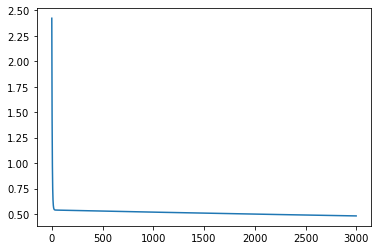

In [29]:
# Completar aquí
fig, ax = plt.subplots()
ax.plot(monitor['coste'])
# --------------------


Observamos un decrecimiento brusco de la función coste en las primeras iteraciones pero después parece decrecer muy lentamente. Quiere decir que hemos alcanzado el mínimo muy rápidamente?

Para comprobarlo, tenéis que representar la evolución del coste pero entre la iteración 50 y la iteración 3000:

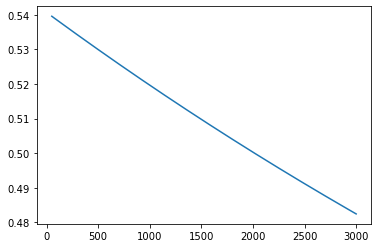

In [30]:
# Completar aquí
fig, ax = plt.subplots()
ax.plot(monitor['coste'][50:3000])
# --------------------


#### Variamos el learning rate.

Vimos que era recomendable probar con distintos valores de $\alpha$. Concretamente, vamos a probar para empezar los valores 
       $$\alpha=0.001\curvearrowright 0.003\curvearrowright0.01$$


Añadir a vuestro algoritmo de gradiente que registraba la evolución en el dataframe monitor, un bucle adicional para explorar estos valores de $\alpha$.

In [31]:
# Completar aquí
alphas = [0.001, 0.003,0.01]
monitor = inicializa_monitor()
for alpha in alphas:
    theta, monitor = buscar_optimo_gradiente(
        theta_inicial,
        coste=J,
        gradiente=gradJ,
        iteraciones=iteraciones,
        alpha=alpha,
        monitor=monitor
    )

# --------------------
monitor

,alpha,theta_0,theta_1,coste
0,0.001,1.000000,1.000000,2.423677
1,0.001,0.997430,0.979298,2.013654
2,0.001,0.995174,0.960986,1.692905
3,0.001,0.993196,0.944788,1.441989
4,0.001,0.991463,0.930459,1.245703
...,...,...,...,...
2995,0.010,3.505063,0.488875,0.296841
2996,0.010,3.505492,0.488818,0.296822
2997,0.010,3.505920,0.488762,0.296804
2998,0.010,3.506349,0.488706,0.296785


Ahora vamos a representar solamente para iter superior a 50, tres líneas de evolución de J en función de la iteración, una para cada valor de $\alpha$.

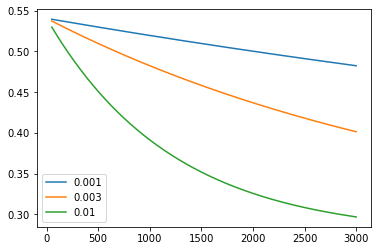

In [32]:
# Completar aquí
fig, ax = plt.subplots()
for alpha in alphas:
    ax.plot(monitor[monitor['alpha'].isin([alpha])]['coste'][50:3000], label = alpha)
    ax.legend(loc = "lower left")
# --------------------


Nos queda probar con `alpha` igual a 0.03 por ejemplo, pero usaremos menos iteraciones, solamente 30.

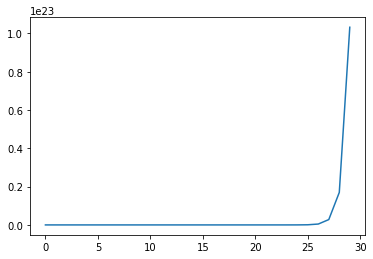

In [33]:
# Completar aquí
monitor = inicializa_monitor()
theta, monitor = buscar_optimo_gradiente(
    theta_inicial,
    coste=J,
    gradiente=gradJ,
    iteraciones=30,
    alpha=0.03,
    monitor=monitor
)
# --------------------
fig, ax = plt.subplots()
ax.plot(monitor.index, monitor['coste'])

#### Parámetros finales
Vamos por lo tanto a quedarnos con alpha=0.01, pero aumentamos el número de iteraciones, por ejemplo a 30000

In [34]:
# Completar aquí
monitor = inicializa_monitor()
theta, monitor = buscar_optimo_gradiente(
    theta_inicial,
    coste=J,
    gradiente=gradJ,
    iteraciones=30000,
    alpha=0.01,
    monitor=monitor
)
# --------------------
print(f'Nuestra estimación de la ordenada al origen es {theta[0]:.2f} mientras que la pendiente es {theta[1]:.2f}')

Nuestra estimación de la ordenada al origen es 4.55 mientras que la pendiente es 0.35


Queremos representar la hipótesis, es decir el modelo con el que nos quedaríamos. Para ello, podréis usar `axline` de `matplotlib` (ver [referencia](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axline.html#matplotlib.axes.Axes.axline))

Text(0, 0.5, 'Nota media ponderada en el grado')

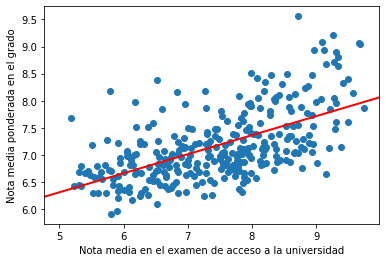

In [35]:
# Completar aquí
fig, ax = plt.subplots()
ax.scatter(grados['NOTA_PAU_CALIFICACION'],grados['MEDIA'])
ax.axline((5,theta[0] + 5 * theta[1]), slope = theta[1], linewidth = 2, color= 'r')
plt.xlabel('Nota media en el examen de acceso a la universidad')
plt.ylabel('Nota media ponderada en el grado')
# --------------------
